- 참조 사이트 : https://dsstudy.tistory.com/m/10

In [69]:
# 경고창무시
import warnings
warnings.filterwarnings('ignore') 

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df_price = pd.read_csv('/content/003490.KS.csv', encoding='utf8')
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5387 non-null   object 
 1   Open       5372 non-null   float64
 2   High       5372 non-null   float64
 3   Low        5372 non-null   float64
 4   Close      5372 non-null   float64
 5   Adj Close  5372 non-null   float64
 6   Volume     5372 non-null   float64
dtypes: float64(6), object(1)
memory usage: 294.7+ KB


In [70]:
df_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5.372000e+03
mean,32021.247041,32551.949225,31459.020095,32012.593615,31496.660696,9.311494e+05
std,17872.202705,18136.868803,17549.369319,17857.573348,17700.405300,1.831899e+06
min,4152.338379,4292.080566,4102.430176,4142.356934,3903.184570,0.000000e+00
25%,17667.400391,17966.847656,17367.953125,17667.400391,16929.472656,4.043875e+05
50%,30443.826172,30800.000000,30050.000000,30443.826172,30090.760742,6.076595e+05
75%,41130.241211,41873.375976,40338.070312,41130.241211,40631.220703,9.735115e+05
max,86839.765625,88736.265625,84843.453125,87239.031250,85415.882813,9.319009e+07


In [71]:
df_price['Date'].head()

0    2000-01-04
1    2000-01-05
2    2000-01-06
3    2000-01-07
4    2000-01-10
Name: Date, dtype: object

In [72]:
df_price['Date'].tail()

5382    2021-06-02
5383    2021-06-03
5384    2021-06-04
5385    2021-06-07
5386    2021-06-08
Name: Date, dtype: object

In [73]:
df_price.isna().sum()

Date          0
Open         15
High         15
Low          15
Close        15
Adj Close    15
Volume       15
dtype: int64

In [74]:
df_price.fillna(method='ffill', inplace=True)

In [75]:
df_price.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [76]:
df_price['Date'] = df_price['Date'].astype('str')

컬럼은 [일자, 시가, 고가, 저가, 종가, 거래량]으로 구성된 매우 단순한 데이터 셋입니다.

 총 9,288개의 row로 구성되어 있네요. 우리는 일자, 시가, 고가, 저가, 거래량을 토대로 미래의 주가인 "종가"를 예측해 보도록 하겠습니다.

 ## 날짜 datetime 포맷으로 변환

In [77]:
pd.to_datetime(df_price['Date'], format='%Y-%m-%d')
# 0      2020-01-07
# 1      2020-01-06
# 2      2020-01-03
# 3      2020-01-02
# 4      2019-12-30

0      2000-01-04
1      2000-01-05
2      2000-01-06
3      2000-01-07
4      2000-01-10
          ...    
5382   2021-06-02
5383   2021-06-03
5384   2021-06-04
5385   2021-06-07
5386   2021-06-08
Name: Date, Length: 5387, dtype: datetime64[ns]

In [78]:
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%Y-%m-%d')
df_price['year'] =df_price['Date'].dt.year
df_price['month'] =df_price['Date'].dt.month
df_price['day'] =df_price['Date'].dt.day

In [79]:
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2000-01-04,10680.292969,11778.267578,10680.292969,11778.267578,11098.211914,2251546.0,2000,1,4
1,2000-01-05,11578.635742,13075.873047,11079.556641,13075.873047,12320.895508,2649880.0,2000,1,5
2,2000-01-06,12976.057617,12976.057617,11279.188477,11578.635742,10910.107422,1865535.0,2000,1,6
3,2000-01-07,11977.899414,12227.438477,11379.003906,11977.899414,11286.316406,1596440.0,2000,1,7
4,2000-01-10,11778.267578,12177.530273,11628.543945,11728.359375,11051.185547,1045826.0,2000,1,10


Text(0, 0.5, 'price')

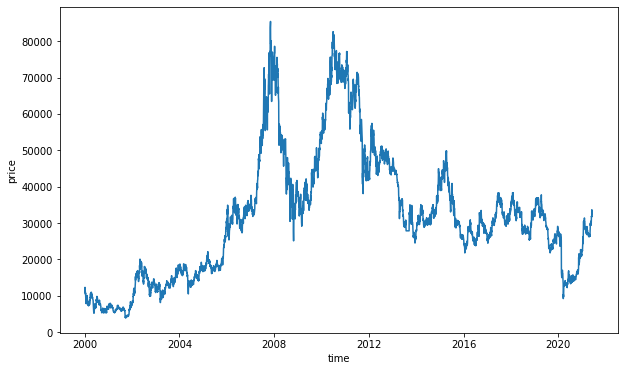

In [80]:
df = df_price.loc[df_price['year']>=2000]

plt.figure(figsize=(10, 6))
sns.lineplot(y=df['Adj Close'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('price')

Text(0, 0.5, 'price')

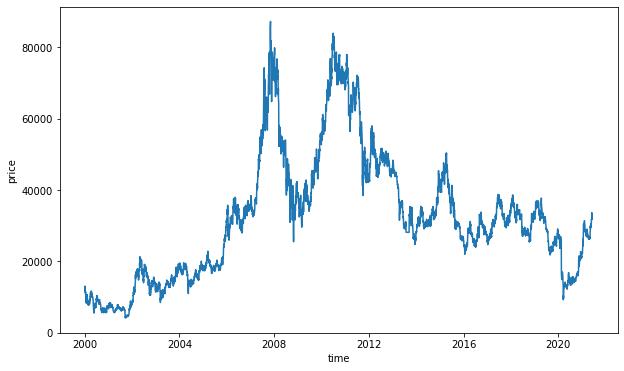

In [81]:
df = df_price.loc[df_price['year']>=2000]

plt.figure(figsize=(10, 6))
sns.lineplot(y=df['Close'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('price')

## Normalization

딥러닝 모델이 학습을 잘하기 위해서는 정규화 해주는 작업이 필요합니다. sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalize 해 주도록 하겠습니다.

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled.head(10)

,Open,High,Low,Adj Close,Volume
0,0.078947,0.088652,0.081469,0.088269,0.024161
1,0.089812,0.104019,0.086414,0.103269,0.028435
2,0.106712,0.102837,0.088886,0.085961,0.020019
3,0.094640,0.093972,0.090122,0.090576,0.017131
4,0.092226,0.093381,0.093213,0.087692,0.011223
5,0.089812,0.092199,0.091977,0.088269,0.013272
6,0.089812,0.087470,0.086414,0.080192,0.009488
7,0.081362,0.085106,0.083941,0.084230,0.008972
8,0.093433,0.089835,0.085796,0.080769,0.008247
9,0.081362,0.079196,0.076524,0.076153,0.010346


MinMaxScaler를 해주면 전체 데이터는 0, 1사이의 값을 갖도록 해줍니다.

## 학습을 시킬 데이터 셋 생성

여기서 window_size를 정의하여 학습 데이터를 생성할 예정입니다. window_size는 내가 얼마동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter 입니다. 즉 내가 과거 20일을 기반으로 내일 데이터를 예측한다라고 가정했을 때는 window_size=20이 됩니다. 저는 과거 20일을 기준으로 그 다음날의 데이터를 예측해 보도록 하겠습니다.

TEST_SIZE = 200은 학습은 과거부터 200일 이전의 데이터를 학습하게 되고, TEST를 위해서 이후 200일의 데이터로 모델이 주가를 예측하도록 한 다음, 실제 데이터와 오차가 얼마나 있는지 확인해 보도록 하겠습니다.

In [83]:
TEST_SIZE = 200
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [84]:
train.shape, test.shape

((5187, 5), (200, 5))

In [85]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

위의 함수는 정해진 window_size에 기반하여 20일 기간의 데이터 셋을 묶어 주는 역할을 합니다.

즉, 순차적으로 20일 동안의 데이터 셋을 묶고, 이에 맞는 label (예측 데이터)와 함께 return해 줍니다.

In [86]:
feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Adj Close']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [87]:
np.shape(train_feature), np.shape(train_label)

((5167, 20, 4), (5167, 1))

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((4133, 20, 4), (1034, 20, 4))

In [89]:
# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

자, 이제 학습해야할 데이터 셋은 모두 준비가 되었습니다. 이젠 모델에 학습을 시켜보고 evaluation을 해볼 차례입니다.

## Keras를 활용한 LSTM 모델 생성

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

모델은 매우 간단한 모델을 적용하였습니다. 이미 우리의 feature 데이터의 복잡도가 그렇게 크지 않고 학습해야할 데이터도 10,000개 이하 수준이기 때문에 아주 단순한 모델로도 충분히 좋은 성능을 기대해 볼 수 있습니다. 

오히려 **너무 복잡한 모델이 과적합을 유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있습니다.**

In [91]:
import os

MODEL_DIR = './model/' #모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR): # 만일 위의 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR) # 이 이름의 폴더를 만들어 줌

model_path='./model/'

from keras.callbacks import ModelCheckpoint

In [92]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
259/259 [==============================] - 10s 31ms/step - loss: 0.0329 - val_loss: 3.8676e-04

Epoch 00001: val_loss improved from inf to 0.00039, saving model to ./model/tmp_checkpoint.h5
Epoch 2/200
259/259 [==============================] - 8s 31ms/step - loss: 3.8404e-04 - val_loss: 3.4023e-04

Epoch 00002: val_loss improved from 0.00039 to 0.00034, saving model to ./model/tmp_checkpoint.h5
Epoch 3/200
259/259 [==============================] - 8s 30ms/step - loss: 3.4266e-04 - val_loss: 3.1893e-04

Epoch 00003: val_loss improved from 0.00034 to 0.00032, saving model to ./model/tmp_checkpoint.h5
Epoch 4/200
259/259 [==============================] - 8s 30ms/step - loss: 2.9931e-04 - val_loss: 2.9013e-04

Epoch 00004: val_loss improved from 0.00032 to 0.00029, saving model to ./model/tmp_checkpoint.h5
Epoch 5/200
259/259 [==============================] - 8s 29ms/step - loss: 3.0599e-04 - val_loss: 2.9615e-04

Epoch 00005: val_loss did not improve from 0.00029
Epoch 6/2

Epoch 32번 기준으로 0.00020 의 평균 오차를 확인할 수 있습니다. 그럼, 학습한 모델로 미래 주가 예측을 해보도록 하겠습니다.

In [93]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

In [97]:
test_feature[1]

array([[0.13205113, 0.12859595, 0.1284257 , 0.04300096],
       [0.12383214, 0.12528206, 0.12743546, 0.02133561],
       [0.12576601, 0.12196818, 0.12297932, 0.02960914],
       [0.1194809 , 0.12007452, 0.12297932, 0.01433599],
       [0.12044784, 0.11912769, 0.12050369, 0.0176909 ],
       [0.1276999 , 0.12575548, 0.1284257 , 0.01833391],
       [0.12721642, 0.12338841, 0.12545495, 0.0182905 ],
       [0.12286519, 0.11912769, 0.12347445, 0.01491395],
       [0.12334866, 0.12054793, 0.12446469, 0.01728732],
       [0.12238172, 0.12054793, 0.12396957, 0.01880676],
       [0.12189825, 0.12102135, 0.12495983, 0.01480976],
       [0.12383214, 0.12338841, 0.1264452 , 0.02171016],
       [0.13060072, 0.12717571, 0.13139646, 0.0247116 ],
       [0.12479907, 0.12812254, 0.12793058, 0.02797917],
       [0.13011725, 0.12764912, 0.13139646, 0.02388297],
       [0.13060072, 0.12717571, 0.13238671, 0.01806283],
       [0.13011725, 0.12622889, 0.13139646, 0.01793333],
       [0.12818337, 0.12480865,

## 실제데이터와 예측한 데이터 시각화

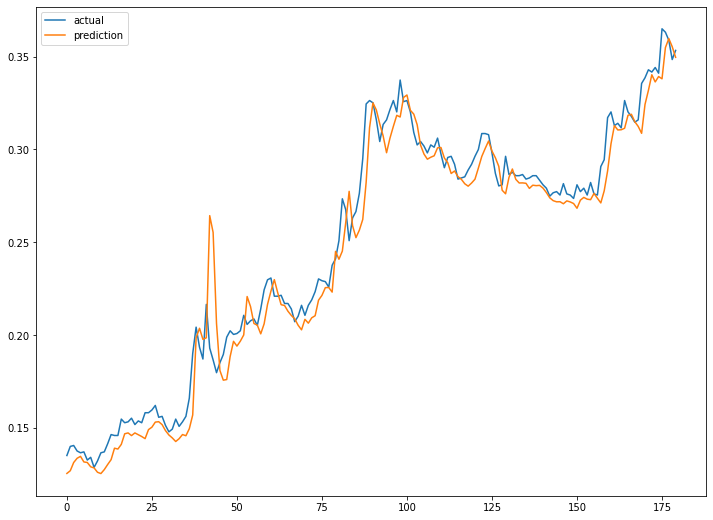

In [94]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

실제 데이터와 어느 정도 비슷한 트렌드를 따라가는 모습입니다.

 

더 많은 데이터, window 사이즈 변경, feature 추가, 모델 수정으로 더 좋은 성능의 모델을 기대해 볼수 있습니다.

최근에는 자연어 처리를 통하여 뉴스 키워드와 주가의 상관관계 분석을 통해 이를 수치화하여 모델에 반영한다면, 훨씬 더 좋은 성능의 예측 모델을 완성할 수 있습니다.